# <u>Project Design:</u>

## Proposal:

You have an entity that can move on a grid of size nxm, with the following moves allowed (one step at a time horizontally/vertically), and there are preset obstacles on the grid. The pre-set obstacles are chess pieces that will prevent the entity from moving to reach its goal. For example a bishop covering a diagonal and if the entity passes a square covered by the bishop's line it is eaten. The obstacle can be eaten by the entity if it is in its path. The task is to find the optimal and shortest path to a point B from a point A an algorithm called Breadth First Search BFS.


## Define the steps of the project

**1.** Define the work's plan (chessboard)  
**2.** Define the mobile object and his moves  
**3.** Add a start and an end points that changes every time I run the code  
**4.** Build a function that caluculate the shortest path with only horizontal and vertical moves.  
**5.** Add two obstacles (like other chess's pieces) and their moves  
**6.** Modify the function for the shortest path and add to avoid the areas covered by the two obstacles  
**7.** Add a visualization of the game  

# <u>Code Part:</u>

In [1]:
# Import all the necessary packages:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import pygame # Import Pygame to create an interactive graphical interface, if you choose to make the game visually dynamic
import scipy
from scipy.stats import norm
import random
import pandas as pd
from PIL import Image
from collections import deque

## 1/2. First and second steps:

In [2]:
# Create the chessboard

class cell:
    def __init__(self, x=0, y=0, dist=0, parent=None):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent

def create_chessboard(N):
    base_row = np.tile([1, 0], (N + 1) // 2)[:N]
    board = np.tile(base_row, (N, 1))
    for i in range(N):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

# 2. Create the knight:

def plot_knight(ax, position):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.5, color='red', fill=True))

def isInside(x, y, N):
    return 0 <= x < N and 0 <= y < N

## 3. Third step:

In [3]:
# Add a start and an end points with a red line for the shortest path:

def draw_path(ax, path):
    x_coords = [p[1] for p in path]
    y_coords = [p[0] for p in path]
    ax.plot(x_coords, y_coords, 'r-', linewidth=2)  # Red line for the path
    start = patches.Rectangle((x_coords[0] - 0.5, y_coords[0] - 0.5), 1, 1, color='green', fill=False, linewidth=3)
    ax.add_patch(start)
    end = patches.Rectangle((x_coords[-1] - 0.5, y_coords[-1] - 0.5), 1, 1, color='blue', fill=False, linewidth=3)
    ax.add_patch(end)

## 4. Fourth step:

In [4]:
def minStepToReachTarget(ax, knightpos, targetpos, N):
    dx = [2, 2, -2, -2, 1, 1, -1, -1]
    dy = [1, -1, 1, -1, 2, -2, 2, -2]

    queue = deque([cell(knightpos[0], knightpos[1], 0)])
    visited = [[False] * N for _ in range(N)]
    visited[knightpos[0]][knightpos[1]] = True

    while queue:
        t = queue.popleft()
        #plot_knight(ax, (t.x, t.y))
        
        if (t.x == targetpos[0] and t.y == targetpos[1]):
            path = []
            # Restituisce il numero di passi e il percorso
            while t:
                path.append((t.x, t.y))
                t = t.parent
            return len(path) - 1, path[::-1]  # Restituisce il percorso invertito e la lunghezza

        for i in range(8):
            x, y = t.x + dx[i], t.y + dy[i]
            if isInside(x, y, N) and not visited[x][y]:
                visited[x][y] = True
                queue.append(cell(x, y, t.dist + 1, t))

    return None  # Se non viene trovato un percorso

## 5. Fifth step:

In [5]:
def is_threatened_by_bishop(x, y, bishop_pos, N):
    if abs(bishop_pos[0] - x) == abs(bishop_pos[1] - y):
        return True
    return False

def plot_piece(ax, position, color='black', label="Bishop"):
    """Funzione per disegnare un pezzo sulla scacchiera."""
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def is_threatened_by_rook(x, y, rook_pos, N):
    if rook_pos[0] == x or rook_pos[1] == y:
        return True
    return False

def plot_piece(ax, position, color='black', label="Rook"):
    """Funzione per disegnare un pezzo sulla scacchiera."""
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

## 6. Sixth step:

In [6]:
def can_move(x, y, N, bishop_pos, rook_pos):
    # Il cavallo può muoversi se non è in una casella minacciata, a meno che non ci sia un ostacolo da "mangiare"
    if (x, y) == bishop_pos or (x, y) == rook_pos:
        return True
    if not is_threatened_by_bishop(x, y, bishop_pos, N) and not is_threatened_by_rook(x, y, rook_pos, N):
        return True
    return False

def minStepToReachTarget(ax, knightpos, targetpos, N, bishop_pos, rook_pos):
    # Codice esistente con l'aggiunta del controllo can_move nelle condizioni di movimento del cavallo
    dx = [2, 2, -2, -2, 1, 1, -1, -1]
    dy = [1, -1, 1, -1, 2, -2, 2, -2]

    queue = deque([cell(knightpos[0], knightpos[1], 0)])
    visited = [[False] * N for _ in range(N)]
    visited[knightpos[0]][knightpos[1]] = True

    while queue:
        t = queue.popleft()
        #plot_knight(ax, (t.x, t.y))
        
        if (t.x == targetpos[0] and t.y == targetpos[1]):
            path = []
            # Restituisce il numero di passi e il percorso
            while t:
                path.append((t.x, t.y))
                t = t.parent
            return len(path) - 1, path[::-1]  # Restituisce il percorso invertito e la lunghezza
        for i in range(8):
            x, y = t.x + dx[i], t.y + dy[i]
            if 0 <= x < N and 0 <= y < N and not visited[x][y] and can_move(x, y, N, bishop_pos, rook_pos):
                visited[x][y] = True
                queue.append(cell(x, y, t.dist + 1, t))

## 7. Seventh step:

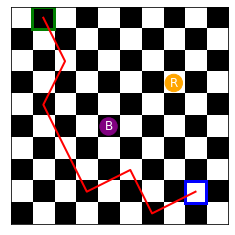

Minimum steps required: 7


In [7]:
N = 10
knightpos = [0, 1]
targetpos = [8, 8]
bishop_pos = (5, 4)
rook_pos = (3, 7)
board = create_chessboard(N)

fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_piece(ax, bishop_pos, 'purple', 'B')  # Visualizza l'alfiere
plot_piece(ax, rook_pos, 'orange', 'R')  # Visualizza la torre
steps, path = minStepToReachTarget(ax, knightpos, targetpos, N, bishop_pos, rook_pos)
draw_path(ax, path)
plt.show()

print(f"Minimum steps required: {steps}")

Minimum steps required: 11


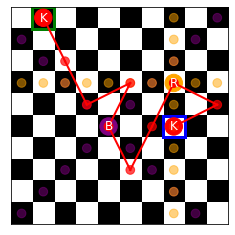

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
import math

class Cell:
    def __init__(self, x=0, y=0, dist=0, parent=None):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent

def create_chessboard(N):
    base_row = np.tile([1, 0], (N + 1) // 2)[:N]
    board = np.tile(base_row, (N, 1))
    for i in range(N):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_piece(ax, position, color, label):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def plot_square(ax, position, color, linewidth):
    ax.add_patch(patches.Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, edgecolor=color, facecolor='none', lw=linewidth))

def is_inside(x, y, N):
    return 0 <= x < N and 0 <= y < N

def is_threatened_by_bishop(x, y, bishopRow, bishopCol):
    return abs(x - bishopRow) == abs(y - bishopCol)

def is_threatened_by_rook(x, y, rookRow, rookCol):
    return x == rookRow or y == rookCol

def is_target_blocked(endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    return is_threatened_by_bishop(endRow, endCol, bishopRow, bishopCol) or is_threatened_by_rook(endRow, endCol, rookRow, rookCol)

def find_path(n, startRow, startCol, targetRow, targetCol, bishopRow, bishopCol, rookRow, rookCol, avoid_threats=True):
    moves = [(2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1)]
    visited = set()
    queue = deque([Cell(startRow, startCol, 0)])
    visited.add((startRow, startCol))

    while queue:
        t = queue.popleft()
        tx, ty = t.x, t.y

        if tx == targetRow and ty == targetCol:
            path = []
            while t:
                path.append((t.x, t.y))
                t = t.parent
            return path[::-1]

        for di, dj in moves:
            cr, cc = tx + di, ty + dj
            if not is_inside(cr, cc, n) or (cr, cc) in visited:
                continue

            if avoid_threats and (is_threatened_by_bishop(cr, cc, bishopRow, bishopCol) or is_threatened_by_rook(cr, cc, rookRow, rookCol)):
                continue

            visited.add((cr, cc))
            queue.append(Cell(cr, cc, t.dist + 1, t))

    return None

def capture_obstacle(n, startRow, startCol, bishopRow, bishopCol, rookRow, rookCol):
    if is_inside(bishopRow, bishopCol, n):
        path_to_bishop = find_path(n, startRow, startCol, bishopRow, bishopCol, bishopRow, bishopCol, rookRow, rookCol, avoid_threats=False)
        if path_to_bishop:
            return path_to_bishop, 'bishop'
    if is_inside(rookRow, rookCol, n):
        path_to_rook = find_path(n, startRow, startCol, rookRow, rookCol, bishopRow, bishopCol, rookRow, rookCol, avoid_threats=False)
        if path_to_rook:
            return path_to_rook, 'rook'
    return None, None

def moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    full_path = []

    while is_target_blocked(endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
        path_to_obstacle, obstacle_type = capture_obstacle(n, startRow, startCol, bishopRow, bishopCol, rookRow, rookCol)
        if not path_to_obstacle:
            return -1, None
        full_path.extend(path_to_obstacle)
        if obstacle_type == 'bishop':
            bishopRow, bishopCol = -1, -1  # Mark bishop as captured
        elif obstacle_type == 'rook':
            rookRow, rookCol = -1, -1  # Mark rook as captured
        startRow, startCol = full_path[-1]

    path_to_target = find_path(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
    if path_to_target:
        full_path.extend(path_to_target)
        return len(full_path) - 1, full_path
    else:
        return -1, None

def plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol):
    if bishopRow < n and bishopCol < n:
        for i in range(n):
            for j in range(n):
                if abs(bishopRow - i) == abs(bishopCol - j) and (i != bishopRow or j != bishopCol):
                    ax.add_patch(patches.Circle((j, i), 0.2, color='purple', fill=True, alpha=0.5))

    if rookRow < n and rookCol < n:
        for i in range(n):
            if i != rookRow:
                ax.add_patch(patches.Circle((rookCol, i), 0.2, color='orange', fill=True, alpha=0.5))
            if i != rookCol:
                ax.add_patch(patches.Circle((i, rookRow), 0.2, color='orange', fill=True, alpha=0.5))

def draw_path(ax, path):
    for (i, j) in path:
        ax.add_patch(patches.Circle((j, i), 0.2, color='red', fill=True, alpha=0.7))
    for k in range(len(path) - 1):
        (i1, j1), (i2, j2) = path[k], path[k + 1]
        ax.plot([j1, j2], [i1, i2], color='red', linewidth=2)

# Configurazione e visualizzazione della scacchiera e dei pezzi
N = 10
startRow, startCol = 0, 1
endRow, endCol = 5, 7
bishopRow, bishopCol = 5, 4
rookRow, rookCol = 3, 7

board = create_chessboard(N)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, N, bishopRow, bishopCol, rookRow, rookCol)

result = moves(N, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
else:
    print("No path found to reach the target.")

plt.show()
